

#**Prediksi Angka Kelahiran di Jawa Barat**

## Import Library ...

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

!pip install scikit-learn
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

### Menampilkan Dataset

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/DESTYAWANSATRIA/PredictBirth_Jabar/refs/heads/main/Data/datapenduduk.csv')
df

,id,kode_provinsi,nama_provinsi,kode_kabupaten_kota,nama_kabupaten_kota,status_kelahiran,jenis_kelamin,jumlah_kelahiran,satuan,tahun
0,1,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIDUP,LAKI-LAKI,61740,JIWA,2012
1,2,32,JAWA BARAT,3201,KABUPATEN BOGOR,HIDUP,PEREMPUAN,49720,JIWA,2012
2,3,32,JAWA BARAT,3201,KABUPATEN BOGOR,MATI,LAKI-LAKI,36,JIWA,2012
3,4,32,JAWA BARAT,3201,KABUPATEN BOGOR,MATI,PEREMPUAN,47,JIWA,2012
4,5,32,JAWA BARAT,3202,KABUPATEN SUKABUMI,HIDUP,LAKI-LAKI,22812,JIWA,2012
...,...,...,...,...,...,...,...,...,...,...
1056,1057,32,JAWA BARAT,3278,KOTA TASIKMALAYA,MATI,PEREMPUAN,42,JIWA,2023
1057,1058,32,JAWA BARAT,3279,KOTA BANJAR,HIDUP,LAKI-LAKI,1448,JIWA,2023
1058,1059,32,JAWA BARAT,3279,KOTA BANJAR,HIDUP,PEREMPUAN,1279,JIWA,2023
1059,1060,32,JAWA BARAT,3279,KOTA BANJAR,MATI,LAKI-LAKI,19,JIWA,2023


In [3]:
columns_to_use = ['nama_kabupaten_kota', 'status_kelahiran', 'jumlah_kelahiran', 'tahun']
filtered_df = df[columns_to_use]

filtered_df

,nama_kabupaten_kota,status_kelahiran,jumlah_kelahiran,tahun
0,KABUPATEN BOGOR,HIDUP,61740,2012
1,KABUPATEN BOGOR,HIDUP,49720,2012
2,KABUPATEN BOGOR,MATI,36,2012
3,KABUPATEN BOGOR,MATI,47,2012
4,KABUPATEN SUKABUMI,HIDUP,22812,2012
...,...,...,...,...
1056,KOTA TASIKMALAYA,MATI,42,2023
1057,KOTA BANJAR,HIDUP,1448,2023
1058,KOTA BANJAR,HIDUP,1279,2023
1059,KOTA BANJAR,MATI,19,2023


## Proses Assesing Data

In [4]:
df.isna().sum()

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
status_kelahiran,0
jenis_kelamin,0
jumlah_kelahiran,0
satuan,0
tahun,0


In [5]:
df.dtypes


,0
id,int64
kode_provinsi,int64
nama_provinsi,object
kode_kabupaten_kota,int64
nama_kabupaten_kota,object
status_kelahiran,object
jenis_kelamin,object
jumlah_kelahiran,int64
satuan,object
tahun,int64


In [6]:
df.isnull().sum()

,0
id,0
kode_provinsi,0
nama_provinsi,0
kode_kabupaten_kota,0
nama_kabupaten_kota,0
status_kelahiran,0
jenis_kelamin,0
jumlah_kelahiran,0
satuan,0
tahun,0


In [7]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1061 entries, 0 to 1060
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   1061 non-null   int64 
 1   kode_provinsi        1061 non-null   int64 
 2   nama_provinsi        1061 non-null   object
 3   kode_kabupaten_kota  1061 non-null   int64 
 4   nama_kabupaten_kota  1061 non-null   object
 5   status_kelahiran     1061 non-null   object
 6   jenis_kelamin        1061 non-null   object
 7   jumlah_kelahiran     1061 non-null   int64 
 8   satuan               1061 non-null   object
 9   tahun                1061 non-null   int64 
dtypes: int64(5), object(5)
memory usage: 83.0+ KB
None


## Exploratory Data Analysis

In [8]:
df['jumlah_kelahiran'] = pd.to_numeric(df['jumlah_kelahiran'], errors='coerce')

In [9]:
data = df[df['status_kelahiran'] == 'HIDUP']

    tahun  jumlah_kelahiran
0    2012            406544
1    2013            352204
2    2014            333441
3    2015            896063
4    2016            856299
5    2017            917556
6    2018            911763
7    2019            825491
8    2020            789541
9    2021            867490
10   2022            832267
11   2023            820059


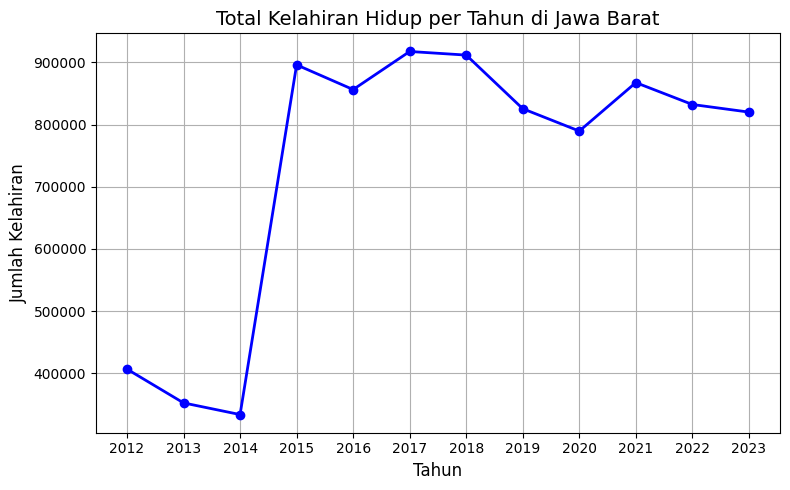

In [10]:
import os

Sdata_per_year = df.groupby(['tahun']).sum()['jumlah_kelahiran'].reset_index()
print(Sdata_per_year)

# Ensure the directory exists
os.makedirs('results/figures/', exist_ok=True)

# Line chart menggunakan Matplotlib
plt.figure(figsize=(8,5))
plt.plot(Sdata_per_year['tahun'], Sdata_per_year['jumlah_kelahiran'], marker='o', color='blue', linewidth=2)
plt.title('Total Kelahiran Hidup per Tahun di Jawa Barat', fontsize=14)
plt.xlabel('Tahun', fontsize=12)
plt.ylabel('Jumlah Kelahiran', fontsize=12)
plt.grid(True)
plt.xticks(Sdata_per_year['tahun'])  # memastikan semua tahun terlihat di sumbu x
plt.tight_layout()
plt.savefig('results/figures/total_births_per_year.png')  # simpan plot
plt.show()

        nama_kabupaten_kota  jumlah_kelahiran
3           KABUPATEN BOGOR           1401924
2          KABUPATEN BEKASI            788397
0         KABUPATEN BANDUNG            588031
24               KOTA DEPOK            514713
20              KOTA BEKASI            429353
15       KABUPATEN SUKABUMI            413155
7           KABUPATEN GARUT            412994
9        KABUPATEN KARAWANG            395144
18             KOTA BANDUNG            357432
8       KABUPATEN INDRAMAYU            356835
17    KABUPATEN TASIKMALAYA            343410
1   KABUPATEN BANDUNG BARAT            326161
6         KABUPATEN CIREBON            323359
14         KABUPATEN SUBANG            265377
5         KABUPATEN CIANJUR            256044
11     KABUPATEN MAJALENGKA            227040
16       KABUPATEN SUMEDANG            211373
21               KOTA BOGOR            210430
10       KABUPATEN KUNINGAN            192734
13     KABUPATEN PURWAKARTA            190975
4          KABUPATEN CIAMIS       

/tmp/ipython-input-3171782843.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=total_births_per_kabupaten.sort_values(by='jumlah_kelahiran', ascending=False), x='jumlah_kelahiran', y='nama_kabupaten_kota', palette='viridis')


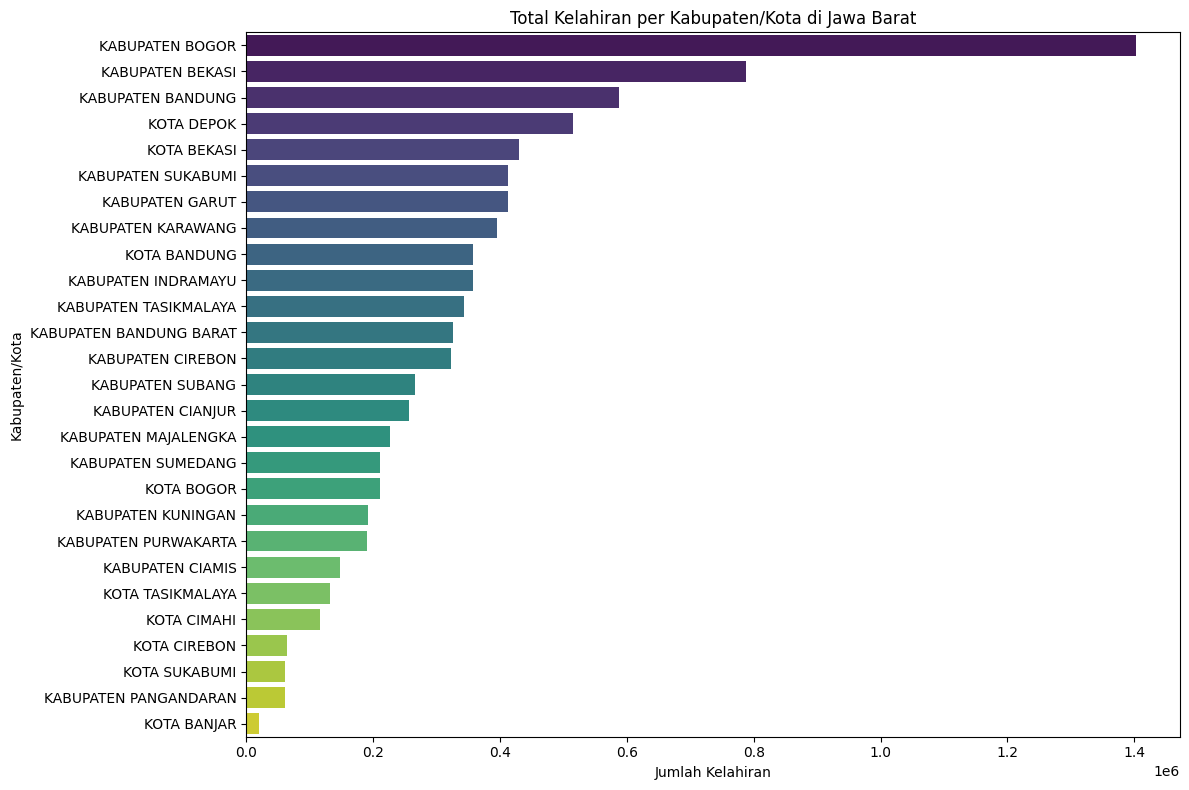

In [11]:
total_births_per_kabupaten = df.groupby('nama_kabupaten_kota')['jumlah_kelahiran'].sum().reset_index()
print(total_births_per_kabupaten.sort_values(by='jumlah_kelahiran', ascending=False))

plt.figure(figsize=(12, 8))
sns.barplot(data=total_births_per_kabupaten.sort_values(by='jumlah_kelahiran', ascending=False), x='jumlah_kelahiran', y='nama_kabupaten_kota', palette='viridis')
plt.title('Total Kelahiran per Kabupaten/Kota di Jawa Barat')
plt.xlabel('Jumlah Kelahiran')
plt.ylabel('Kabupaten/Kota')
plt.tight_layout()
plt.show()

Distribusi Kelahiran berdasarkan Jenis Kelamin:
  jenis_kelamin  jumlah_kelahiran
0     LAKI-LAKI           4444375
1     PEREMPUAN           4364343


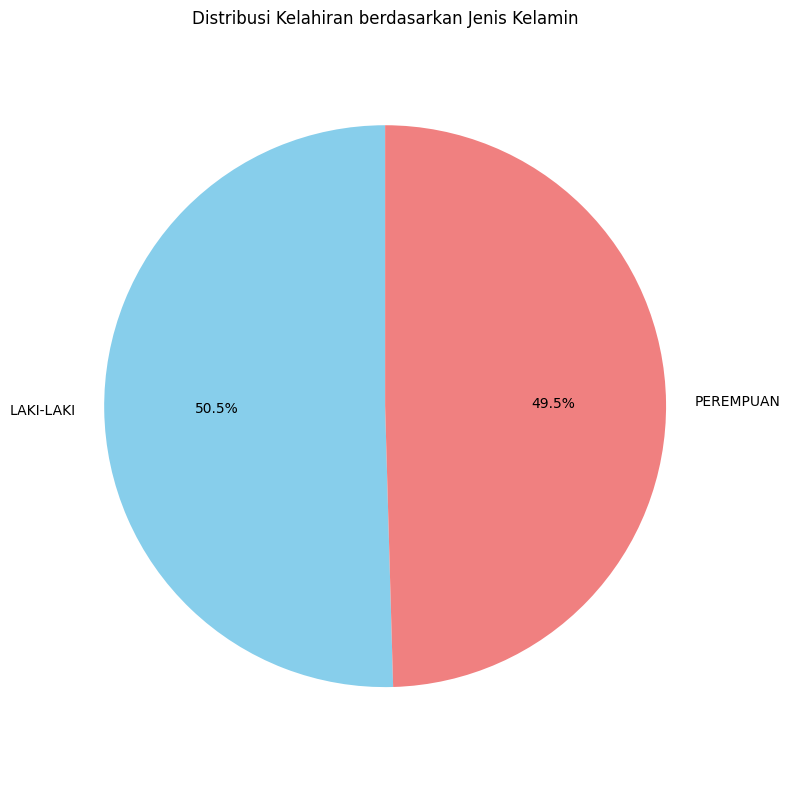

In [12]:
births_by_gender = df.groupby('jenis_kelamin')['jumlah_kelahiran'].sum().reset_index()
print("Distribusi Kelahiran berdasarkan Jenis Kelamin:")
print(births_by_gender)

plt.figure(figsize=(8, 8))
plt.pie(births_by_gender['jumlah_kelahiran'], labels=births_by_gender['jenis_kelamin'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'lightcoral'])
plt.title('Distribusi Kelahiran berdasarkan Jenis Kelamin')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.tight_layout()
plt.show()

Distribusi Kelahiran berdasarkan Status Kelahiran:
  status_kelahiran  jumlah_kelahiran
0            HIDUP           8785303
1             MATI             23415


/tmp/ipython-input-696723062.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=births_by_status, x='status_kelahiran', y='jumlah_kelahiran', palette='coolwarm')


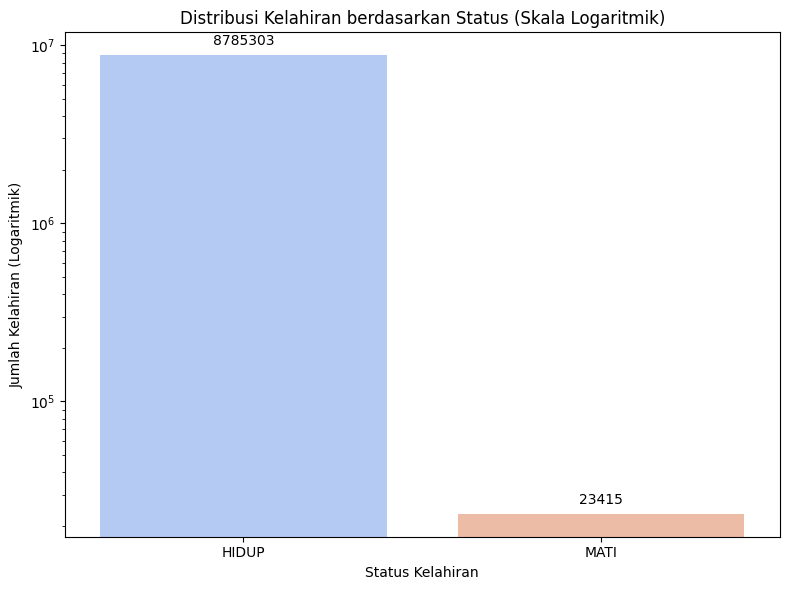

In [13]:
births_by_status = df.groupby('status_kelahiran')['jumlah_kelahiran'].sum().reset_index()
print("Distribusi Kelahiran berdasarkan Status Kelahiran:")
print(births_by_status)

plt.figure(figsize=(8, 6))
ax = sns.barplot(data=births_by_status, x='status_kelahiran', y='jumlah_kelahiran', palette='coolwarm')
plt.title('Distribusi Kelahiran berdasarkan Status (Skala Logaritmik)')
plt.xlabel('Status Kelahiran')
plt.ylabel('Jumlah Kelahiran (Logaritmik)')
plt.yscale('log')  # Apply logarithmic scale to y-axis

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom',
                xytext=(0, 5),
                textcoords='offset points')

plt.tight_layout()
plt.show()

## Menghitung Outlier

In [14]:

# Misalkan df adalah DataFrame Anda dan 'jumlah_kelahiran' adalah kolom yang ingin diperiksa
Q1 = df['jumlah_kelahiran'].quantile(0.25)
Q3 = df['jumlah_kelahiran'].quantile(0.75)
IQR = Q3 - Q1

batas_bawah = Q1 - 1.5 * IQR
batas_atas = Q3 + 1.5 * IQR

# Identifikasi outlier
outliers = df[(df['jumlah_kelahiran'] < batas_bawah) | (df['jumlah_kelahiran'] > batas_atas)]

print("Outliers:")
print(outliers)

Outliers:
        id  kode_provinsi nama_provinsi  kode_kabupaten_kota  \
0        1             32    JAWA BARAT                 3201   
1        2             32    JAWA BARAT                 3201   
38      39             32    JAWA BARAT                 3201   
39      40             32    JAWA BARAT                 3201   
86      87             32    JAWA BARAT                 3201   
87      88             32    JAWA BARAT                 3201   
126    127             32    JAWA BARAT                 3201   
127    128             32    JAWA BARAT                 3201   
178    179             32    JAWA BARAT                 3216   
179    180             32    JAWA BARAT                 3216   
222    223             32    JAWA BARAT                 3201   
223    224             32    JAWA BARAT                 3201   
274    275             32    JAWA BARAT                 3216   
275    276             32    JAWA BARAT                 3216   
318    319             32    J

## Prediksi jumlah kelahiran



### 1.   Proses training dataset


*   Menggunakan data dari tahun 2012 - 2022 sebagai data training
*   Menggunakan data 2023 sebagai data test





In [15]:
# Agregasi data per kabupaten dan tahun
df_grouped = df.groupby(["tahun", "nama_kabupaten_kota"])["jumlah_kelahiran"].sum().reset_index()

# Pisahkan data untuk pelatihan dan pengujian
df_train = df_grouped[df_grouped['tahun'] < 2023]  # Data pelatihan dari 2012-2022
df_test = df_grouped[df_grouped['tahun'] == 2023]  # Data pengujian untuk 2023

# Buat model prediksi untuk setiap kabupaten
prediksi_total = {}
actual_total = {}

# Loop melalui setiap kabupaten untuk pelatihan dan pengujian
for kabupaten in df_train['nama_kabupaten_kota'].unique():
    df_kabupaten_train = df_train[df_train['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X_train = df_kabupaten_train['tahun'].values.reshape(-1, 1)  # Tahun
    y_train = df_kabupaten_train['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Prediksi untuk tahun 2023
    X_test = np.array([[2023]])
    prediksi_2023 = model.predict(X_test)
    prediksi_total[kabupaten] = prediksi_2023[0]

    # Simpan nilai aktual untuk evaluasi
    actual_total[kabupaten] = df_test[df_test['nama_kabupaten_kota'] == kabupaten]['jumlah_kelahiran'].values[0]

# Hitung total prediksi dan total aktual untuk seluruh Jawa Barat
total_prediksi = sum(prediksi_total.values())
total_aktual = sum(actual_total.values())

print("Prediksi jumlah kelahiran di tahun 2023 per kabupaten:")
for kabupaten, prediksi in prediksi_total.items():
    print(f"{kabupaten}: {prediksi}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2023: {total_prediksi}")
print(f"Total aktual kelahiran di Jawa Barat pada tahun 2023: {total_aktual}")


Prediksi jumlah kelahiran di tahun 2023 per kabupaten:
KABUPATEN BANDUNG BARAT: 28527.666666666686
KABUPATEN BEKASI: 76371.52234636887
KABUPATEN BOGOR: 113664.12727272743
KABUPATEN INDRAMAYU: 28654.941058940953
KABUPATEN MAJALENGKA: 19135.299700299744
KABUPATEN SUKABUMI: 30033.875
KABUPATEN TASIKMALAYA: 27916.75757575757
KOTA CIMAHI: 10468.322677322678
KOTA CIREBON: 5032.254545454547
KOTA DEPOK: 43373.0
KABUPATEN PANGANDARAN: 5751.048387096787
KABUPATEN SUMEDANG: 16733.333333333256
KOTA BANJAR: 2469.1329787234135
KOTA BOGOR: 18438.399999999965
KOTA SUKABUMI: 5426.783870967745
KOTA TASIKMALAYA: 10823.466666666616
KABUPATEN KUNINGAN: 17170.19444444438
KABUPATEN PURWAKARTA: 15986.833333333489
KABUPATEN BANDUNG: 62471.17857142864
KABUPATEN CIAMIS: 17715.206521739077
KABUPATEN GARUT: 48763.31506849313
KABUPATEN KARAWANG: 35878.53571428545
KABUPATEN SUBANG: 28261.71428571432
KOTA BANDUNG: 31804.964285714086
KOTA BEKASI: 42767.5
KABUPATEN CIANJUR: 31975.266666666605
KABUPATEN CIREBON: 44301.6

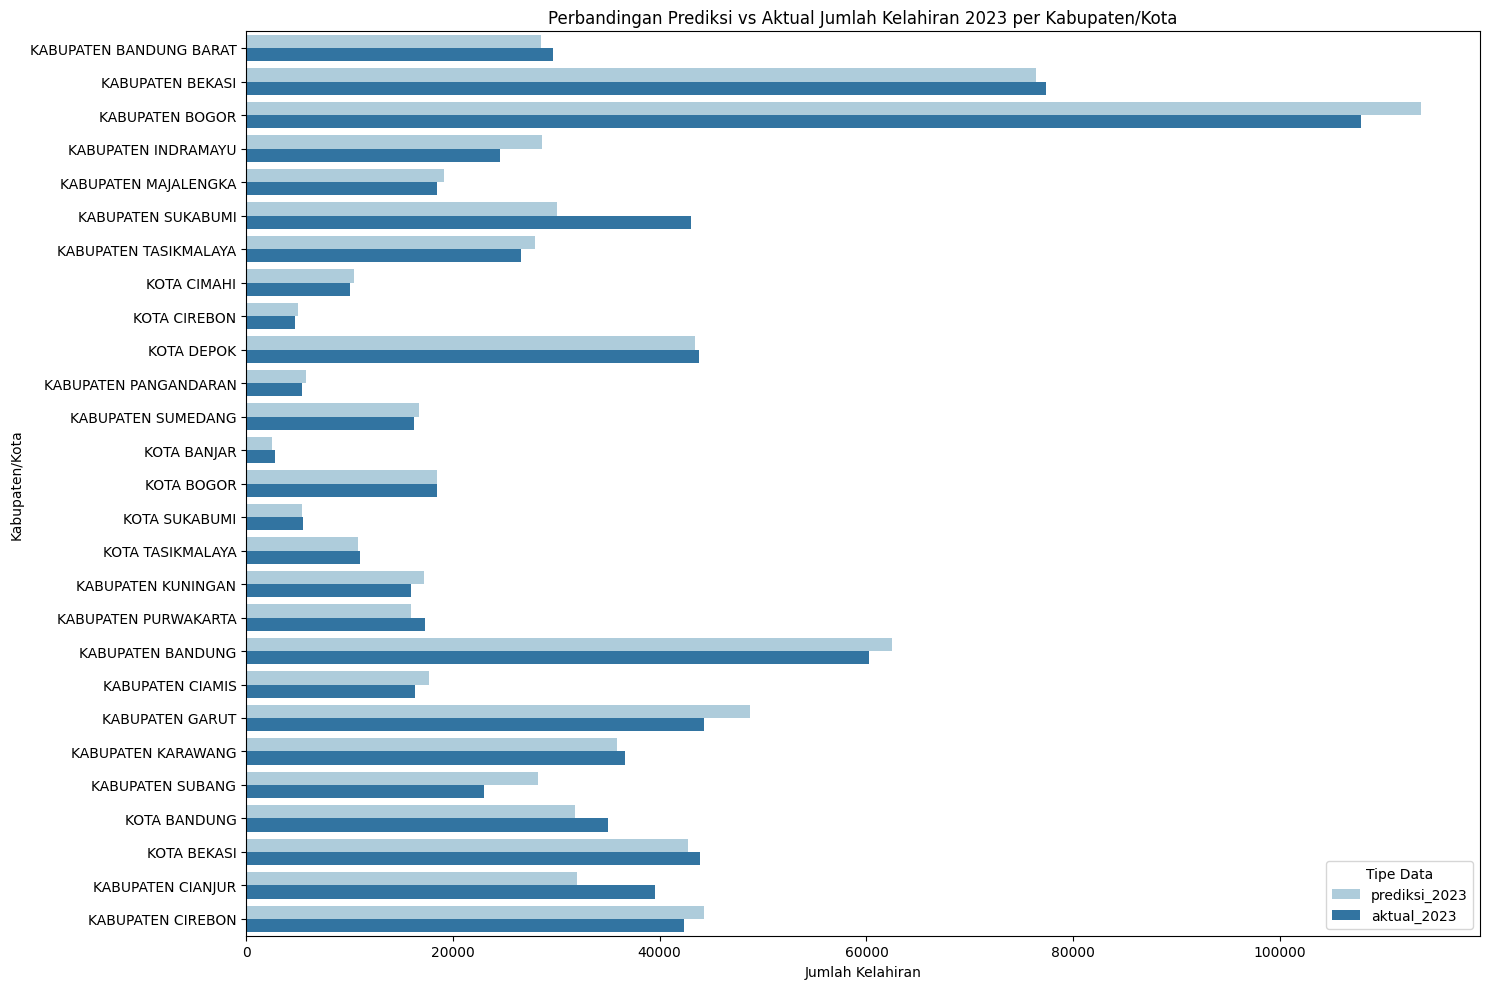

In [16]:
prediksi_df_2023 = pd.DataFrame(list(prediksi_total.items()), columns=['kabupaten_kota', 'prediksi_2023'])
actual_df_2023 = pd.DataFrame(list(actual_total.items()), columns=['kabupaten_kota', 'aktual_2023'])

comparison_df = pd.merge(prediksi_df_2023, actual_df_2023, on='kabupaten_kota')
comparison_df_melted = comparison_df.melt(id_vars='kabupaten_kota', var_name='Tipe Data', value_name='Jumlah Kelahiran')

plt.figure(figsize=(15, 10))
sns.barplot(data=comparison_df_melted, x='Jumlah Kelahiran', y='kabupaten_kota', hue='Tipe Data', palette='Paired')
plt.title('Perbandingan Prediksi vs Aktual Jumlah Kelahiran 2023 per Kabupaten/Kota')
plt.xlabel('Jumlah Kelahiran')
plt.ylabel('Kabupaten/Kota')
plt.legend(title='Tipe Data')
plt.tight_layout()
plt.show()

In [17]:
# Evaluasi hasil prediksi
mae = mean_absolute_error(list(actual_total.values()), list(prediksi_total.values()))
mse = mean_squared_error(list(actual_total.values()), list(prediksi_total.values()))
rmse = np.sqrt(mse)
r2 = r2_score(list(actual_total.values()), list(prediksi_total.values()))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 2221.7856511120835
Mean Squared Error (MSE): 13181492.382791372
Root Mean Squared Error (RMSE): 3630.6325045081844
R-squared (R²): 0.9758144401761352


### Akurasi Training Data mendekati 1 yaitu **0.9758144401761352** yang artinya sangat akurat



### 2.   Prediksi Jumlah kelahiran ditahun 2024 - 2027



Prediksi jumlah kelahiran di tahun 2024 per kabupaten:
KABUPATEN BANDUNG BARAT: 28738
KABUPATEN BEKASI: 76215
KABUPATEN BOGOR: 111052
KABUPATEN INDRAMAYU: 26480
KABUPATEN MAJALENGKA: 18613
KABUPATEN SUKABUMI: 32833
KABUPATEN TASIKMALAYA: 26799
KOTA CIMAHI: 10311
KOTA CIREBON: 4855
KOTA DEPOK: 43594
KABUPATEN PANGANDARAN: 5541
KABUPATEN SUMEDANG: 16053
KOTA BANJAR: 2552
KOTA BOGOR: 18290
KOTA SUKABUMI: 5319
KOTA TASIKMALAYA: 10646
KABUPATEN KUNINGAN: 16202
KABUPATEN PURWAKARTA: 15841
KABUPATEN BANDUNG: 60715
KABUPATEN CIAMIS: 16800
KABUPATEN GARUT: 45851
KABUPATEN KARAWANG: 34211
KABUPATEN SUBANG: 25463
KOTA BANDUNG: 31354
KOTA BEKASI: 42071
KABUPATEN CIANJUR: 35135
KABUPATEN CIREBON: 42482

Total prediksi kelahiran di Jawa Barat pada tahun 2024: 804016


/tmp/ipython-input-3484036250.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prediksi_df, x='jumlah_prediksi_2024', y='nama_kabupaten_kota', palette='magma')


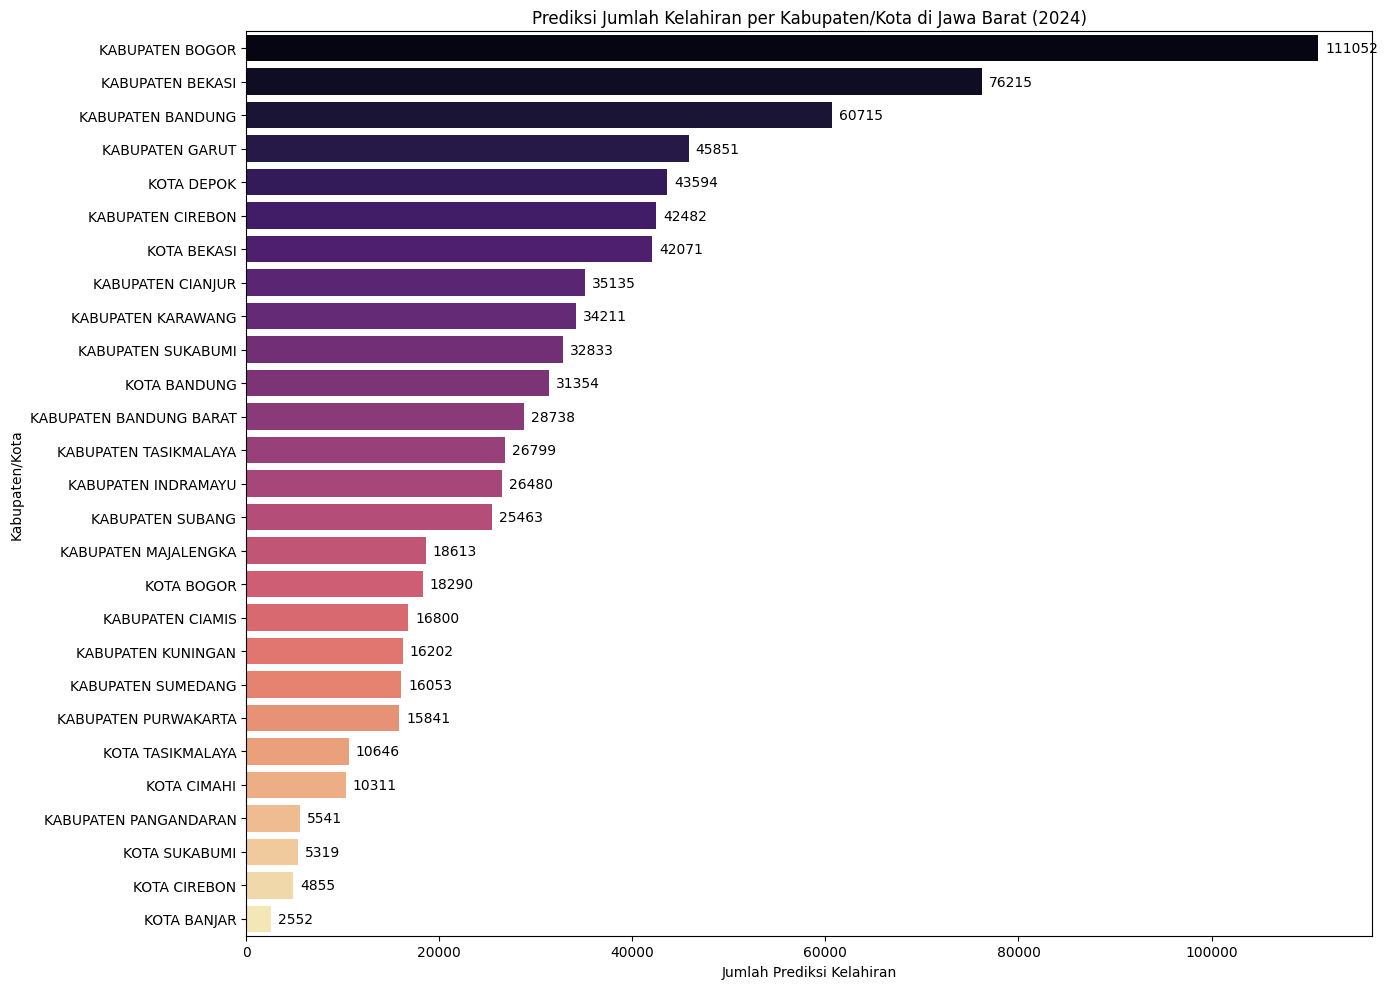

In [18]:
# Buat model prediksi untuk setiap kabupaten
prediksi_total_2024 = {}

# Loop melalui setiap kabupaten untuk prediksi
for kabupaten in df_grouped['nama_kabupaten_kota'].unique():
    df_kabupaten = df_grouped[df_grouped['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X = df_kabupaten['tahun'].values.reshape(-1, 1)  # Tahun
    y = df_kabupaten['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2024
    prediksi_2024 = model.predict(np.array([[2024]]))
    prediksi_total_2024[kabupaten] = prediksi_2024[0]

# Hitung total prediksi untuk seluruh Jawa Barat
total_prediksi_2024 = sum(prediksi_total_2024.values())

print("Prediksi jumlah kelahiran di tahun 2024 per kabupaten:")
for kabupaten, prediksi in prediksi_total_2024.items():
    print(f"{kabupaten}: {prediksi:.0f}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2024: {total_prediksi_2024:.0f}")

# Visualisasi hasil prediksi 2024
prediksi_df = pd.DataFrame(list(prediksi_total_2024.items()), columns=['nama_kabupaten_kota', 'jumlah_prediksi_2024'])
prediksi_df = prediksi_df.sort_values(by='jumlah_prediksi_2024', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=prediksi_df, x='jumlah_prediksi_2024', y='nama_kabupaten_kota', palette='magma')
plt.title('Prediksi Jumlah Kelahiran per Kabupaten/Kota di Jawa Barat (2024)')
plt.xlabel('Jumlah Prediksi Kelahiran')
plt.ylabel('Kabupaten/Kota')

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}',
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center',
                       xytext=(5, 0),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

Prediksi jumlah kelahiran di tahun 2025 per kabupaten:
KABUPATEN BANDUNG BARAT: 28588
KABUPATEN BEKASI: 75755
KABUPATEN BOGOR: 110163
KABUPATEN INDRAMAYU: 25516
KABUPATEN MAJALENGKA: 18285
KABUPATEN SUKABUMI: 31487
KABUPATEN TASIKMALAYA: 26073
KOTA CIMAHI: 10275
KOTA CIREBON: 4781
KOTA DEPOK: 43702
KABUPATEN PANGANDARAN: 5443
KABUPATEN SUMEDANG: 15526
KOTA BANJAR: 2538
KOTA BOGOR: 18150
KOTA SUKABUMI: 5178
KOTA TASIKMALAYA: 10409
KABUPATEN KUNINGAN: 15644
KABUPATEN PURWAKARTA: 15249
KABUPATEN BANDUNG: 59790
KABUPATEN CIAMIS: 16462
KABUPATEN GARUT: 44697
KABUPATEN KARAWANG: 32272
KABUPATEN SUBANG: 24658
KOTA BANDUNG: 29682
KOTA BEKASI: 40945
KABUPATEN CIANJUR: 34774
KABUPATEN CIREBON: 41554

Total prediksi kelahiran di Jawa Barat pada tahun 2025: 787595


/tmp/ipython-input-3355533562.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prediksi_df, x='jumlah_prediksi_2025', y='nama_kabupaten_kota', palette='magma')


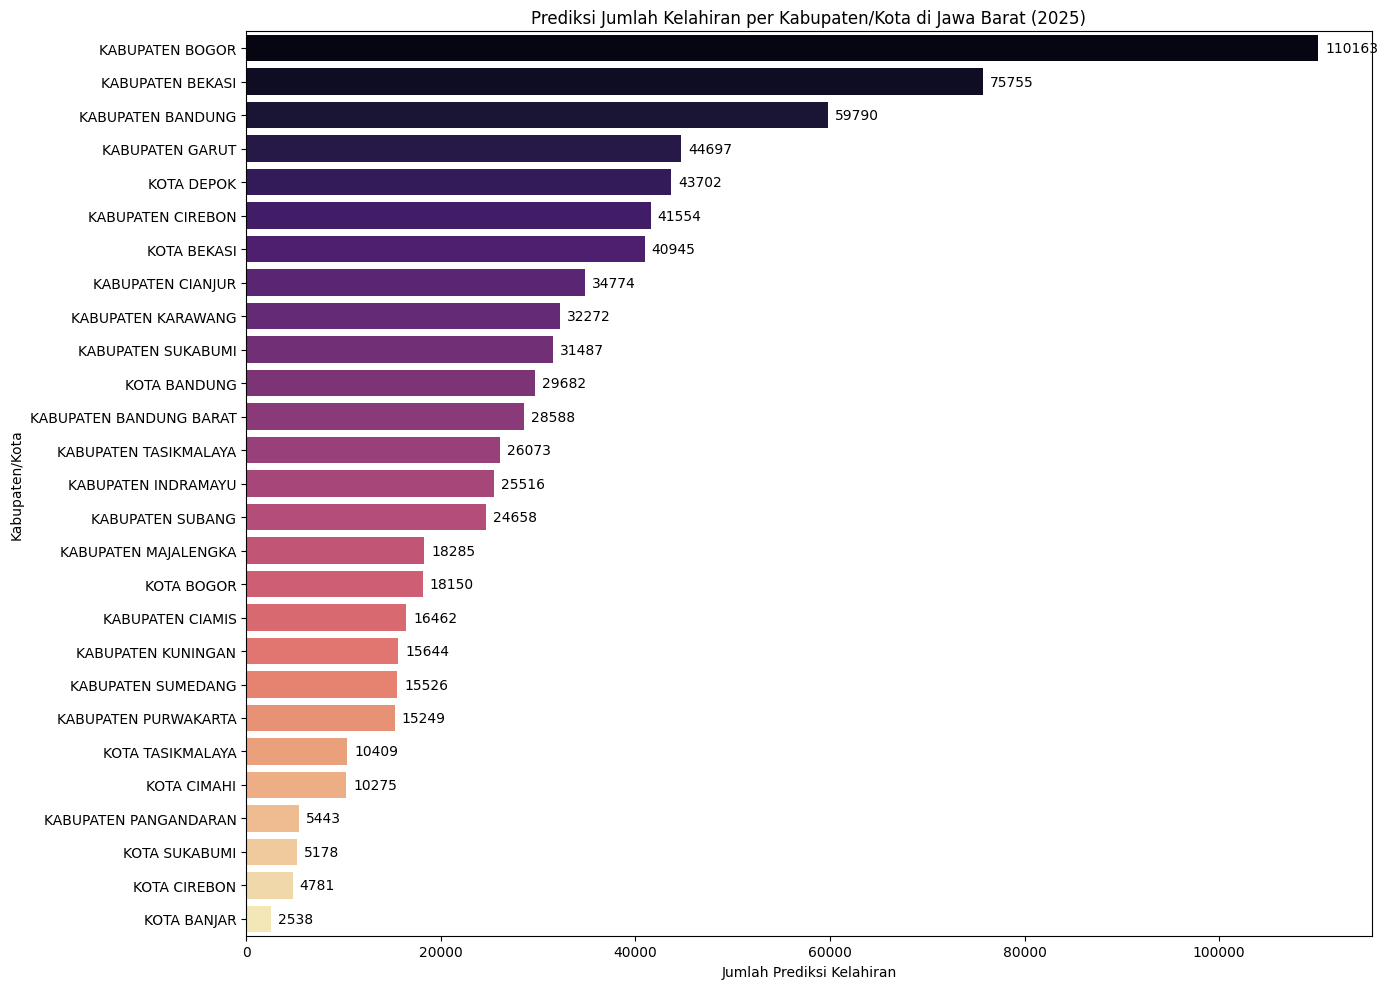

In [19]:
# Buat model prediksi untuk setiap kabupaten
prediksi_total_2025 = {}

# Loop melalui setiap kabupaten untuk prediksi
for kabupaten in df_grouped['nama_kabupaten_kota'].unique():
    df_kabupaten = df_grouped[df_grouped['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X = df_kabupaten['tahun'].values.reshape(-1, 1)  # Tahun
    y = df_kabupaten['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2025
    prediksi_2025 = model.predict(np.array([[2025]]))
    prediksi_total_2025[kabupaten] = prediksi_2025[0]

# Hitung total prediksi untuk seluruh Jawa Barat
total_prediksi_2025 = sum(prediksi_total_2025.values())

print("Prediksi jumlah kelahiran di tahun 2025 per kabupaten:")
for kabupaten, prediksi in prediksi_total_2025.items():
    print(f"{kabupaten}: {prediksi:.0f}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2025: {total_prediksi_2025:.0f}")

# Visualisasi hasil prediksi 2025
prediksi_df = pd.DataFrame(list(prediksi_total_2025.items()), columns=['nama_kabupaten_kota', 'jumlah_prediksi_2025'])
prediksi_df = prediksi_df.sort_values(by='jumlah_prediksi_2025', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=prediksi_df, x='jumlah_prediksi_2025', y='nama_kabupaten_kota', palette='magma')
plt.title('Prediksi Jumlah Kelahiran per Kabupaten/Kota di Jawa Barat (2025)')
plt.xlabel('Jumlah Prediksi Kelahiran')
plt.ylabel('Kabupaten/Kota')

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}',
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center',
                       xytext=(5, 0),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

Prediksi jumlah kelahiran di tahun 2026 per kabupaten:
KABUPATEN BANDUNG BARAT: 28438
KABUPATEN BEKASI: 75295
KABUPATEN BOGOR: 109275
KABUPATEN INDRAMAYU: 24552
KABUPATEN MAJALENGKA: 17957
KABUPATEN SUKABUMI: 30140
KABUPATEN TASIKMALAYA: 25347
KOTA CIMAHI: 10240
KOTA CIREBON: 4708
KOTA DEPOK: 43810
KABUPATEN PANGANDARAN: 5345
KABUPATEN SUMEDANG: 14999
KOTA BANJAR: 2523
KOTA BOGOR: 18010
KOTA SUKABUMI: 5036
KOTA TASIKMALAYA: 10171
KABUPATEN KUNINGAN: 15086
KABUPATEN PURWAKARTA: 14656
KABUPATEN BANDUNG: 58866
KABUPATEN CIAMIS: 16123
KABUPATEN GARUT: 43542
KABUPATEN KARAWANG: 30334
KABUPATEN SUBANG: 23853
KOTA BANDUNG: 28010
KOTA BEKASI: 39818
KABUPATEN CIANJUR: 34413
KABUPATEN CIREBON: 40626

Total prediksi kelahiran di Jawa Barat pada tahun 2026: 771174


/tmp/ipython-input-3880253989.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prediksi_df, x='jumlah_prediksi_2026', y='nama_kabupaten_kota', palette='magma')


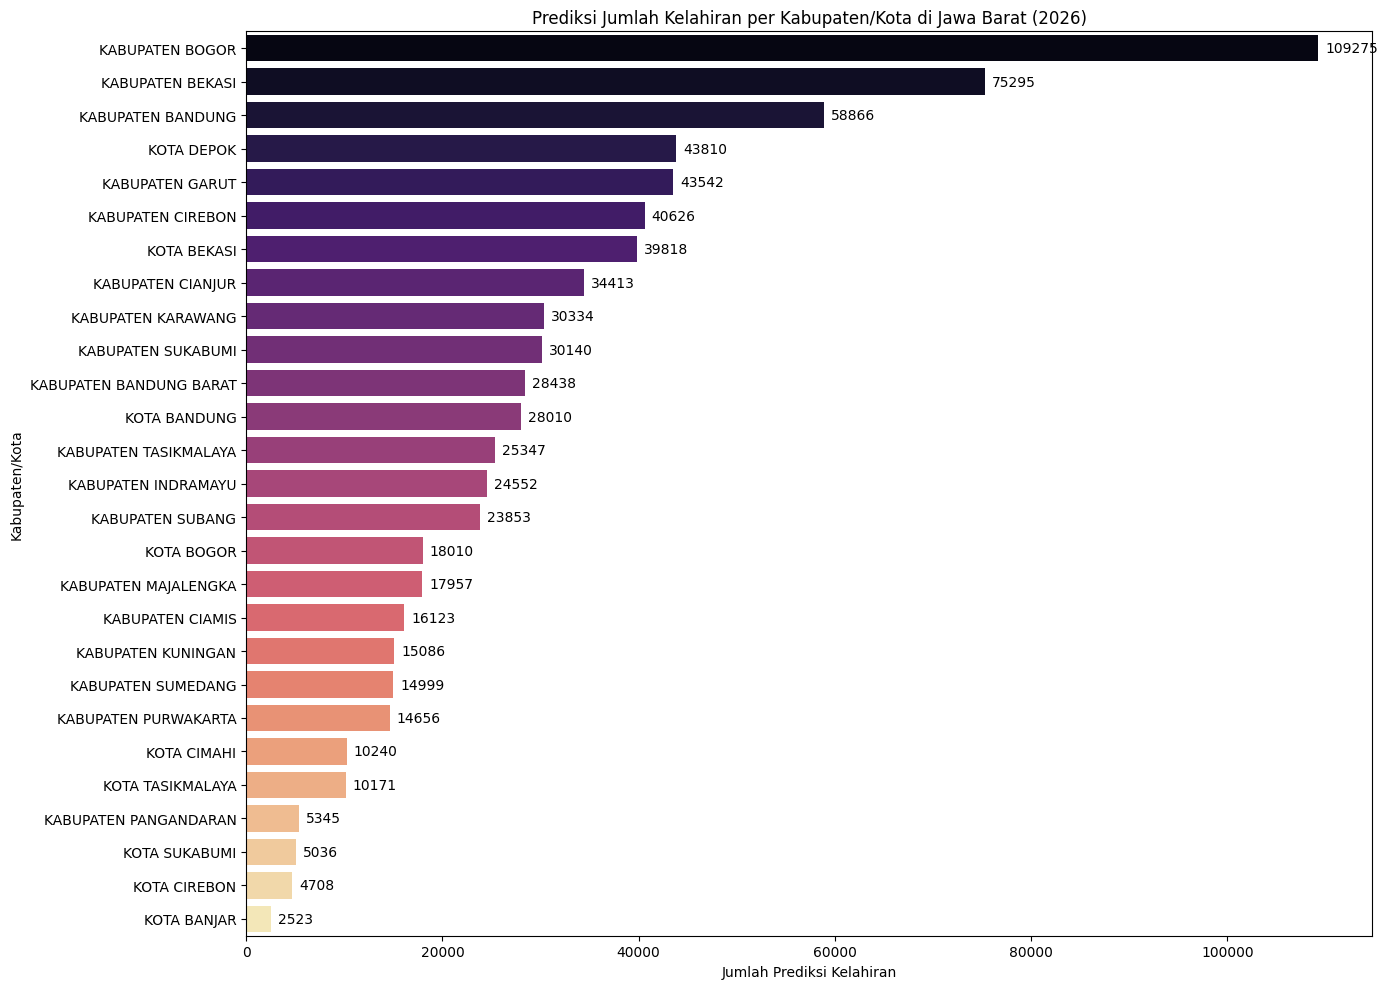

In [20]:
# Buat model prediksi untuk setiap kabupaten
prediksi_total_2026 = {}

# Loop melalui setiap kabupaten untuk prediksi
for kabupaten in df_grouped['nama_kabupaten_kota'].unique():
    df_kabupaten = df_grouped[df_grouped['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X = df_kabupaten['tahun'].values.reshape(-1, 1)  # Tahun
    y = df_kabupaten['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2026
    prediksi_2026 = model.predict(np.array([[2026]]))
    prediksi_total_2026[kabupaten] = prediksi_2026[0]

# Hitung total prediksi untuk seluruh Jawa Barat
total_prediksi_2026 = sum(prediksi_total_2026.values())

print("Prediksi jumlah kelahiran di tahun 2026 per kabupaten:")
for kabupaten, prediksi in prediksi_total_2026.items():
    print(f"{kabupaten}: {prediksi:.0f}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2026: {total_prediksi_2026:.0f}")

# Visualisasi hasil prediksi 2026
prediksi_df = pd.DataFrame(list(prediksi_total_2026.items()), columns=['nama_kabupaten_kota', 'jumlah_prediksi_2026'])
prediksi_df = prediksi_df.sort_values(by='jumlah_prediksi_2026', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=prediksi_df, x='jumlah_prediksi_2026', y='nama_kabupaten_kota', palette='magma')
plt.title('Prediksi Jumlah Kelahiran per Kabupaten/Kota di Jawa Barat (2026)')
plt.xlabel('Jumlah Prediksi Kelahiran')
plt.ylabel('Kabupaten/Kota')

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}',
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center',
                       xytext=(5, 0),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

Prediksi jumlah kelahiran di tahun 2027 per kabupaten:
KABUPATEN BANDUNG BARAT: 28288
KABUPATEN BEKASI: 74834
KABUPATEN BOGOR: 108386
KABUPATEN INDRAMAYU: 23588
KABUPATEN MAJALENGKA: 17629
KABUPATEN SUKABUMI: 28794
KABUPATEN TASIKMALAYA: 24622
KOTA CIMAHI: 10204
KOTA CIREBON: 4635
KOTA DEPOK: 43918
KABUPATEN PANGANDARAN: 5246
KABUPATEN SUMEDANG: 14472
KOTA BANJAR: 2509
KOTA BOGOR: 17870
KOTA SUKABUMI: 4895
KOTA TASIKMALAYA: 9934
KABUPATEN KUNINGAN: 14527
KABUPATEN PURWAKARTA: 14064
KABUPATEN BANDUNG: 57942
KABUPATEN CIAMIS: 15784
KABUPATEN GARUT: 42387
KABUPATEN KARAWANG: 28395
KABUPATEN SUBANG: 23049
KOTA BANDUNG: 26338
KOTA BEKASI: 38691
KABUPATEN CIANJUR: 34052
KABUPATEN CIREBON: 39698

Total prediksi kelahiran di Jawa Barat pada tahun 2027: 754752


/tmp/ipython-input-313099265.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=prediksi_df, x='jumlah_prediksi_2027', y='nama_kabupaten_kota', palette='magma')


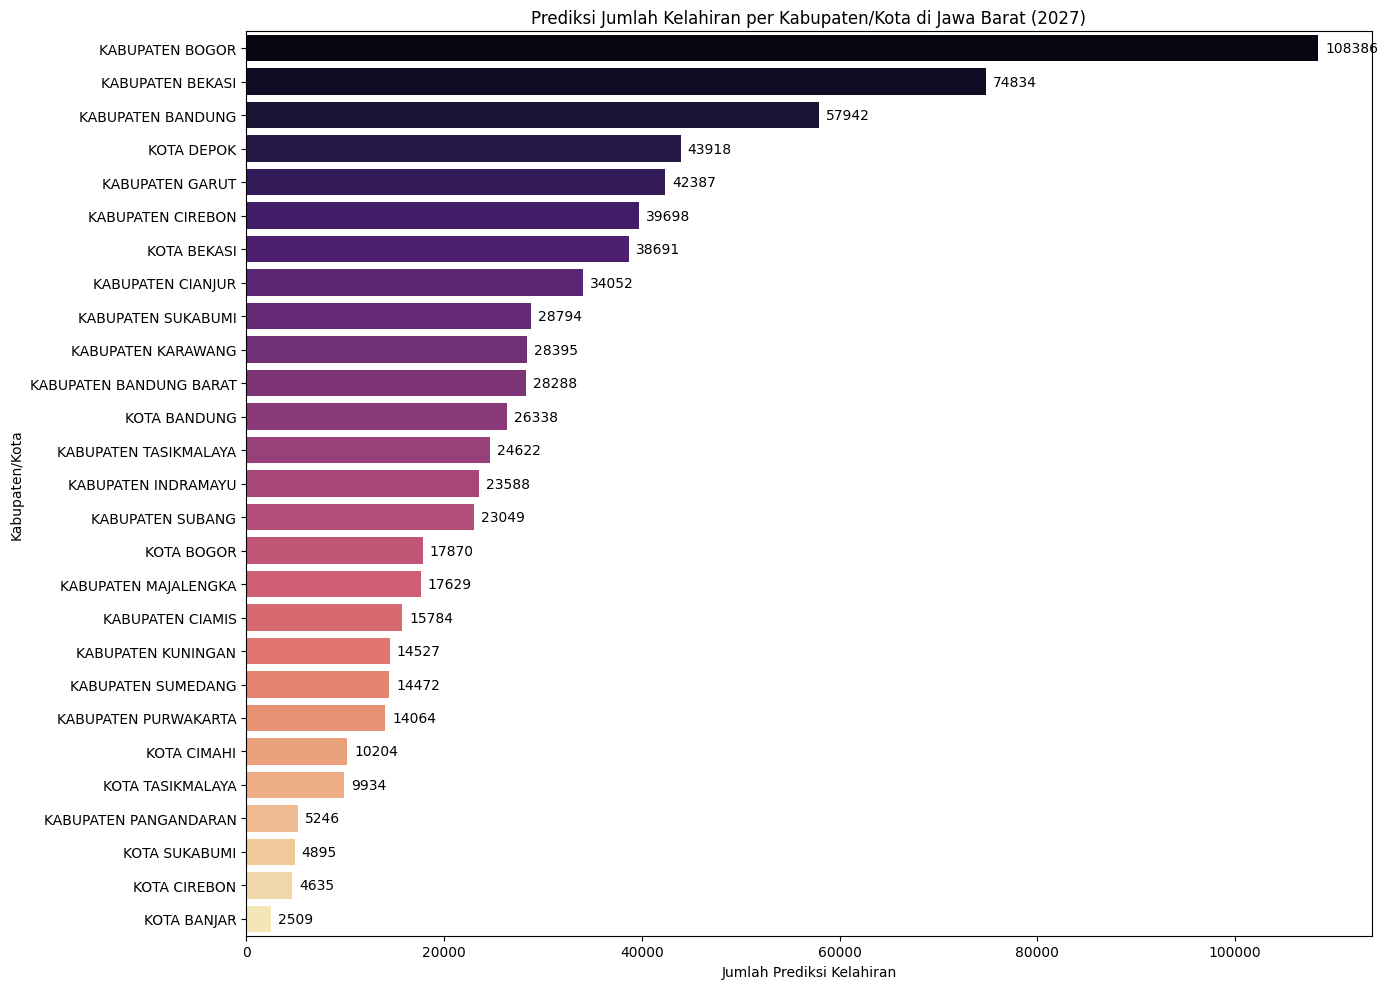

In [21]:
# Buat model prediksi untuk setiap kabupaten
prediksi_total_2027 = {}

# Loop melalui setiap kabupaten untuk prediksi
for kabupaten in df_grouped['nama_kabupaten_kota'].unique():
    df_kabupaten = df_grouped[df_grouped['nama_kabupaten_kota'] == kabupaten]

    # Siapkan data untuk model
    X = df_kabupaten['tahun'].values.reshape(-1, 1)  # Tahun
    y = df_kabupaten['jumlah_kelahiran'].values  # Jumlah kelahiran

    # Melatih model regresi linier
    model = LinearRegression()
    model.fit(X, y)

    # Prediksi untuk tahun 2027
    prediksi_2027 = model.predict(np.array([[2027]]))
    prediksi_total_2027[kabupaten] = prediksi_2027[0]

# Hitung total prediksi untuk seluruh Jawa Barat
total_prediksi_2027 = sum(prediksi_total_2027.values())

print("Prediksi jumlah kelahiran di tahun 2027 per kabupaten:")
for kabupaten, prediksi in prediksi_total_2027.items():
    print(f"{kabupaten}: {prediksi:.0f}")

print(f"\nTotal prediksi kelahiran di Jawa Barat pada tahun 2027: {total_prediksi_2027:.0f}")

# Visualisasi hasil prediksi 2027
prediksi_df = pd.DataFrame(list(prediksi_total_2027.items()), columns=['nama_kabupaten_kota', 'jumlah_prediksi_2027'])
prediksi_df = prediksi_df.sort_values(by='jumlah_prediksi_2027', ascending=False)

plt.figure(figsize=(14, 10))
sns.barplot(data=prediksi_df, x='jumlah_prediksi_2027', y='nama_kabupaten_kota', palette='magma')
plt.title('Prediksi Jumlah Kelahiran per Kabupaten/Kota di Jawa Barat (2027)')
plt.xlabel('Jumlah Prediksi Kelahiran')
plt.ylabel('Kabupaten/Kota')

# Add data labels to the bars
for p in plt.gca().patches:
    plt.gca().annotate(f'{p.get_width():.0f}',
                       (p.get_width(), p.get_y() + p.get_height() / 2.),
                       ha='left', va='center',
                       xytext=(5, 0),
                       textcoords='offset points')

plt.tight_layout()
plt.show()

/tmp/ipython-input-961069238.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=predicted_totals_df, x='Tahun', y='Total Prediksi Kelahiran', palette='viridis')


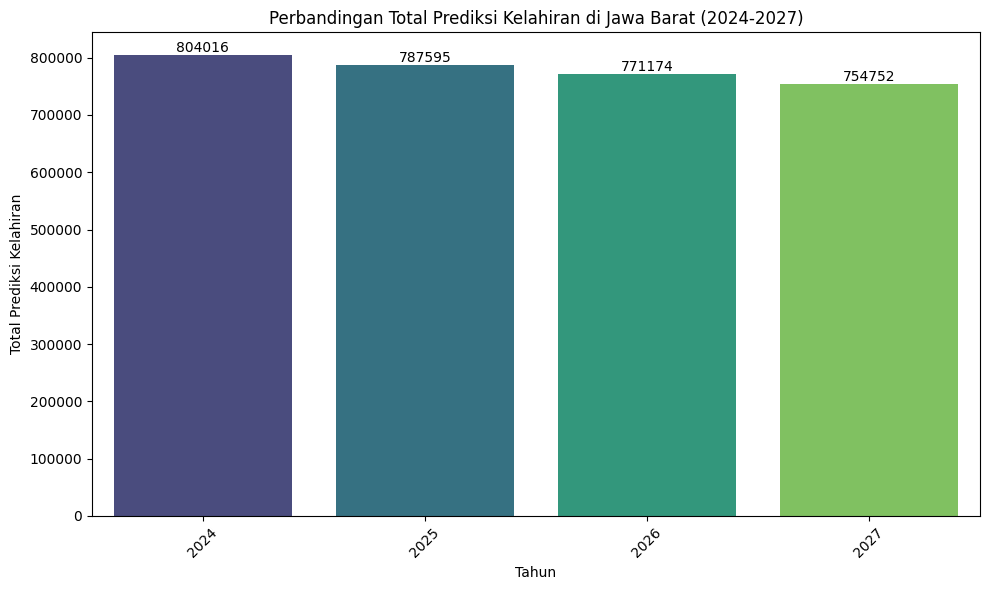

In [22]:
predicted_totals = {
    'Tahun': [2024, 2025, 2026, 2027],
    'Total Prediksi Kelahiran': [total_prediksi_2024, total_prediksi_2025, total_prediksi_2026, total_prediksi_2027]
}

predicted_totals_df = pd.DataFrame(predicted_totals)

plt.figure(figsize=(10, 6))
sns.barplot(data=predicted_totals_df, x='Tahun', y='Total Prediksi Kelahiran', palette='viridis')
plt.title('Perbandingan Total Prediksi Kelahiran di Jawa Barat (2024-2027)')
plt.xlabel('Tahun')
plt.ylabel('Total Prediksi Kelahiran')
plt.xticks(rotation=45)

# Add data labels to the bars
for index, row in predicted_totals_df.iterrows():
    plt.text(row.name, row['Total Prediksi Kelahiran'], f'{row['Total Prediksi Kelahiran']:.0f}',
             color='black', ha="center", va="bottom")

plt.tight_layout()
plt.show()

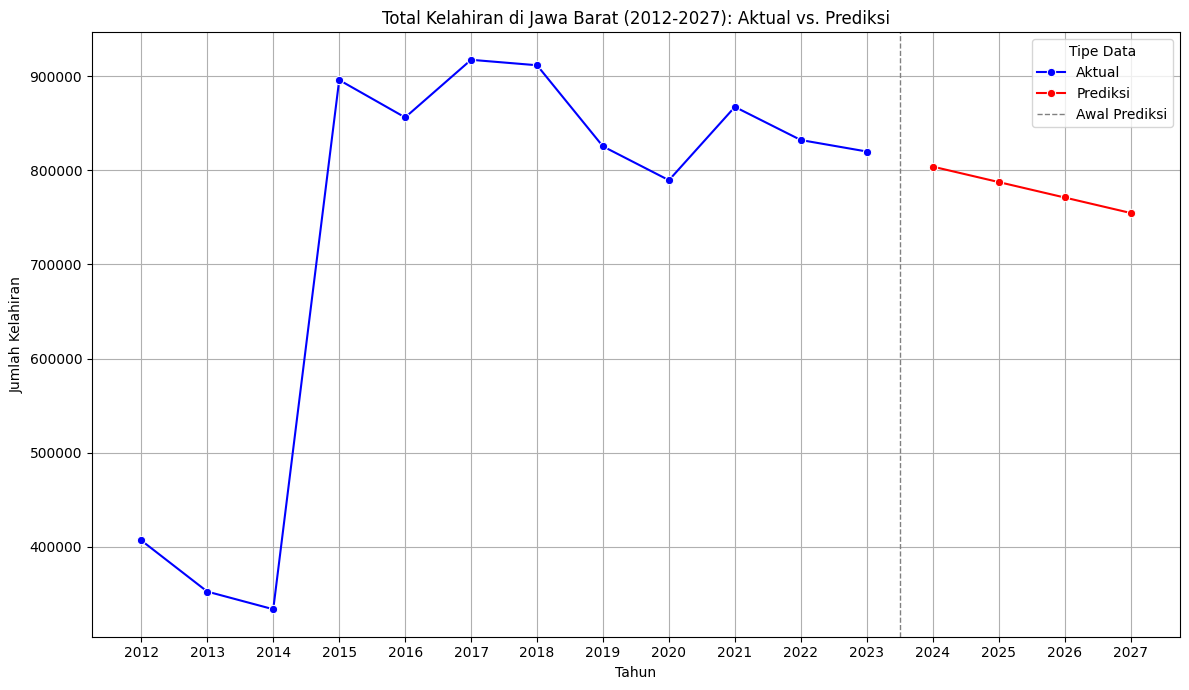

In [23]:
# Prepare historical data (2012-2023)
historical_data = Sdata_per_year[['tahun', 'jumlah_kelahiran']]
historical_data['Tipe Data'] = 'Aktual'

# Prepare predicted data (2024-2027)
predicted_data = predicted_totals_df.copy()
predicted_data.rename(columns={'Tahun': 'tahun', 'Total Prediksi Kelahiran': 'jumlah_kelahiran'}, inplace=True)
predicted_data['jumlah_kelahiran'] = predicted_data['jumlah_kelahiran'].round(0).astype(int) # Round to integer
predicted_data['Tipe Data'] = 'Prediksi'

# Combine historical and predicted data
combined_data = pd.concat([historical_data, predicted_data], ignore_index=True)

plt.figure(figsize=(12, 7))
sns.lineplot(data=combined_data, x='tahun', y='jumlah_kelahiran', hue='Tipe Data', marker='o', palette={'Aktual': 'blue', 'Prediksi': 'red'})

# Add a vertical line to separate actual from predicted data (at year 2023.5)
plt.axvline(x=2023.5, color='gray', linestyle='--', linewidth=1, label='Awal Prediksi')

plt.title('Total Kelahiran di Jawa Barat (2012-2027): Aktual vs. Prediksi')
plt.xlabel('Tahun')
plt.ylabel('Jumlah Kelahiran')
plt.xticks(combined_data['tahun'].unique()) # Show all years on x-axis
plt.grid(True)
plt.legend(title='Tipe Data')
plt.tight_layout()
plt.show()

In [24]:
!pip freeze > requirements.txt
